# Optimizing Event Locations and Urban Management in Melbourne

**Authored by:** Sahan Chamod

---

**Duration:** 90 mins  
**Level:** Intermediate  
**Pre-requisite Skills:** Python, Data Analysis, Pandas, Data Visualization


## Scenario:
The city of Melbourne hosts numerous events annually, including weddings, film shoots, public events, promotions, and fun runs. Optimal event site selection is critical to ensure attendee convenience, minimal disruption, and efficient urban space utilization. Currently, event planners and city authorities often face challenges with inadequate location suitability data, resulting in pedestrian congestion, parking difficulties, and unintended urban disruptions. This project aims to solve these issues by providing data-driven insights into optimal event location selection.

## Project Objective:
To identify optimal locations for different types of events in Melbourne by analyzing historical event permit data, pedestrian traffic trends, and on-street parking availability.

## Project Stages:

### Stage 1: Data Collection & Integration
- Acquire datasets from:
  - Event Permits (2014-2018)
  - Pedestrian Counting System (hourly counts)
  - On-Street Parking Bays
- Cleanse and preprocess datasets to handle missing values, anomalies, and integrate data into a unified schema suitable for analysis.

### Stage 2: Exploratory Data Analysis (EDA)
- Analyze event permit data to identify frequent event locations, types, and durations.
- Explore pedestrian count data to identify hourly, daily, weekly, and seasonal traffic patterns.
- Assess parking bay data to evaluate the availability and accessibility of parking spaces near potential event sites.

### Stage 3: Location Suitability Analysis
- Develop analytical models integrating event frequency, pedestrian traffic intensity, and parking availability to rate locations.
- Classify locations based on event suitability, accessibility, and expected disruption.
- Identify peak traffic and parking constraint periods to avoid scheduling major disruptive events.

### Stage 4: Visualization and Dashboard Development
- Create an interactive dashboard using visualization tools (e.g., Power BI, Tableau) to present suitability scores, historical event distribution, pedestrian traffic trends, and parking availability.
- Provide city planners, event organizers, and local businesses easy access to insights for informed decision-making.

### Stage 5: Validation and Recommendations
- Validate the model by comparing predicted optimal locations with historical successful events.
- Offer recommendations for infrastructure improvements and targeted policy-making to support high-demand areas for large-scale events.

## Expected Outcomes:
- Enhanced efficiency in selecting and managing event locations.
- Improved attendee experience through reduced congestion and better parking management.
- Reduced disruptions in pedestrian and vehicular traffic.
- Informed infrastructure development aligned with city event management needs.

## Dataset Descriptions:

### 1. Event Permits 2014-2018
- Contains permits data for events such as film shoots, photo shoots, weddings, Christmas parties, promotions, fun runs, and public events.
- Useful for understanding event frequency, type, duration, and spatial distribution across Melbourne.

### 2. Pedestrian Counting System (Hourly Counts)
- Records pedestrian activity hourly from sensors placed at various city locations.
- Essential for identifying pedestrian traffic patterns, peak periods, and location-specific pedestrian volumes.

### 3. On-Street Parking Bays
- Consists of spatial polygons representing on-street parking bays across Melbourne.
- Provides data on parking locations, availability, and restrictions, critical for assessing parking accessibility near potential event locations.

## Libraries

In [1]:
from config import API_KEY
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import warnings

## Read Data Using API

In [2]:
# Hide unnecessary warnings
warnings.filterwarnings('ignore')

#Function to collect data 
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': API_KEY # Replace with your personal key
    }

    # GET request
    response = requests.get(url, params=params)
    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset 
    else:
        print(f'Request failed with status code {response.status_code}')

# Read data using the function
event_df = collect_data('event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa')
pedestrian_df = collect_data('pedestrian-counting-system-monthly-counts-per-hour')
parking_df = collect_data('on-street-parking-bays')
p_sensor_loc = collect_data('pedestrian-counting-system-sensor-locations')

## Data Frames

In [3]:
p_sensor_loc.head()

,location_id,sensor_description,sensor_name,installation_date,note,location_type,status,direction_1,direction_2,latitude,longitude,location
0,24,Spencer St-Collins St (North),Col620_T,2013-09-02,NaN,Outdoor,A,East,West,-37.818880,144.954492,"-37.81887963, 144.95449198"
1,25,Melbourne Convention Exhibition Centre,MCEC_T,2013-08-28,NaN,Outdoor,A,East,West,-37.824018,144.956044,"-37.82401776, 144.95604426"
2,36,Queen St (West),Que85_T,2015-01-20,"Pushbox Upgrade, 03/08/2023",Outdoor,A,North,South,-37.816525,144.961211,"-37.81652527, 144.96121062"
3,41,Flinders La-Swanston St (West),Swa31,2017-06-29,NaN,Outdoor,A,North,South,-37.816686,144.966897,"-37.81668634, 144.96689733"
4,44,Tin Alley-Swanston St (West),UM3_T,2015-04-15,"Pushbox Upgrade, 30/06/2023",Outdoor,A,North,South,-37.796987,144.964413,"-37.79698741, 144.96441306"


In [4]:
event_df.head()

,title,event_start,event_end,category_1,category_2,location
0,Anthony,2015-02-17,2015-02-17,Filming - Movie,NaN,Inner Suburb Locations
1,Spirit Of The Game,2015-08-18,2015-08-18,Filming - Movie,NaN,Carlton Gardens
2,Ali's Wedding,2015-11-30,2015-11-30,Filming - Movie,NaN,Inner Suburb Locations
3,Dogfight,2016-08-23,2016-08-23,Filming - Movie,NaN,Inner Suburb Locations
4,Dogfight Unit Base,2016-09-21,2016-09-21,Filming - Movie,NaN,Flagstaff Gardens


In [5]:
pedestrian_df.head()

,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,1381720250130,138,2025-01-30,17,17,4,21,EntPark1671_T,"-37.81996544, 144.95981454"
1,672020210912,67,2021-09-12,20,13,25,38,FLDegS_T,"-37.81688755, 144.96562569"
2,202020241121,20,2024-11-21,20,242,414,656,LtB170_T,"-37.81172914, 144.9682466"
3,1082320240518,108,2024-05-18,23,13,96,109,261Will_T,"-37.81295822, 144.95678789"
4,631520211102,63,2021-11-02,15,205,283,488,Bou231_T,"-37.81333081, 144.96675571"


In [6]:
parking_df.head()

,roadsegmentid,kerbsideid,roadsegmentdescription,latitude,longitude,lastupdated,location
0,22377,NaN,The Avenue between MacArthur Road and Gatehous...,-37.791266,144.957666,2023-10-31,"-37.7912665, 144.9576663"
1,22377,NaN,The Avenue between MacArthur Road and Gatehous...,-37.791217,144.957644,2023-10-31,"-37.7912171, 144.9576439"
2,22377,NaN,The Avenue between MacArthur Road and Gatehous...,-37.790648,144.957501,2023-10-31,"-37.7906483, 144.9575005"
3,22377,NaN,The Avenue between MacArthur Road and Gatehous...,-37.790596,144.957492,2023-10-31,"-37.7905957, 144.9574921"
4,22377,NaN,The Avenue between MacArthur Road and Gatehous...,-37.790488,144.957475,2023-10-31,"-37.7904884, 144.9574751"


In [7]:
print(f'Parking df\t\t\t: {parking_df.shape}')
print(f'Event df\t\t\t: {event_df.shape}')
print(f'Pedestrian df\t\t\t: {pedestrian_df.shape}')
print(f'Parking sensor location\t\t: {p_sensor_loc.shape}')

Parking df			: (23864, 7)
Event df			: (2827, 6)
Pedestrian df			: (2257293, 9)
Parking sensor location		: (132, 12)


In [8]:
pedestrian_df['location_id'].nunique()

97

## Data Cleaning

#### Event Data Frame

In [9]:
# Replace some values to fix spelling
event_df['category_1'] = event_df['category_1'].replace(
    {'Public Event - Run/Walk':'Public Event - Run Walk',
     'Pubilc Event - Non-ticketed': 'Public Event - Non-ticketed',
     'Public Event - Non Ticketed': 'Public Event - Non-ticketed'
     }
)

In [10]:
# Convert event_start to datetime
event_df['event_start'] = pd.to_datetime(event_df['event_start'], errors='coerce')

#### Pedestrian Data Frame

In [11]:
# Convert date column to date type
pedestrian_df['sensing_date'] = pd.to_datetime(pedestrian_df['sensing_date'], errors='coerce')

## Exploratory Data Analysis

### Overview of Event Permits (2014-2018)

**How many events?**

This section outlines the types of permitted events that took place in the Melbourne city area between 2014 and 2018. Insights drawn from this dataset will be used in the project to identify common event types and their typical time frames. This information will also support the analysis of the most suitable locations and optimal timings for hosting various events across the city.

In [12]:
print(f'Total number of events that took place in above time frame: {event_df.shape[0]}')

Total number of events that took place in above time frame: 2827


**What kind of events?**

In [13]:
eve_cat1_counts = event_df['category_1'].value_counts()
print(eve_cat1_counts)

category_1
Wedding                                    615
Public Event - Non-ticketed                511
Promotion                                  430
Filming - TV Series                        200
Public Event - Run Walk                    198
Filming - TVC                              158
Public Event - Ticketed                    111
Public Event - Low Impact Activity          92
Filming - Photo shoot                       90
Private Event                               87
Filming - Unit Base                         58
Filming - Student                           57
Public Event - Music Event                  41
Filming - Other                             40
Public Event - Media/Launch Event           36
Public Event - Memorial                     25
Filming - Movie                             21
Public Event - Cycling Event                19
Public Event - Parade                       16
Public Event - Music                         6
Public Event - Cycling                       3
Fi

According to the results above, the dataset contains a large number of event categories, which makes the analysis more complex than necessary. To simplify the analysis, it would be more effective to introduce a new classification that groups events under broader categories such as “Public” and “Private” events.

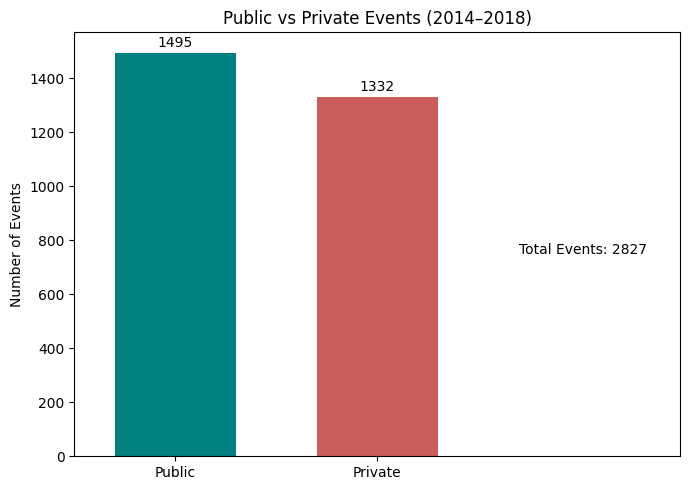

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))  # Set fixed size for the chart

# Classify as 'Public' or 'Private'
event_df['event_type'] = event_df['category_1'].apply(
    lambda x: 'Public' if 'Public' in x or 'Promotion' in x else 'Private'
)

# Count event types
event_counts = event_df['event_type'].value_counts()
labels = event_counts.index
values = event_counts.values
xpos = np.arange(len(labels))

# Plot bars
bars = ax.bar(xpos, values, color=['teal', 'indianred'], width=0.6)

# Add labels on bars
for i, value in enumerate(values):
    ax.text(xpos[i], value + 20, value, ha='center', fontsize=10)

# Add total events text on the side
total_events = sum(values)
ax.text(
    xpos[-1] + 0.7, max(values) / 2,
    f'Total Events: {total_events}'
)

# Tidy up axes
ax.set_xticks(xpos)
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Events')
ax.set_title('Public vs Private Events (2014–2018)')
ax.set_xlim(-0.5, xpos[-1] + 1.5)  # Prevent auto-resize due to side text

plt.tight_layout()
plt.show()

The bar chart shows that from 2014 to 2018, Melbourne hosted 2827 events in total including slightly more Public events (1,495) than Private events (1,332). This indicates a fairly balanced distribution, with public events being just a bit more common.

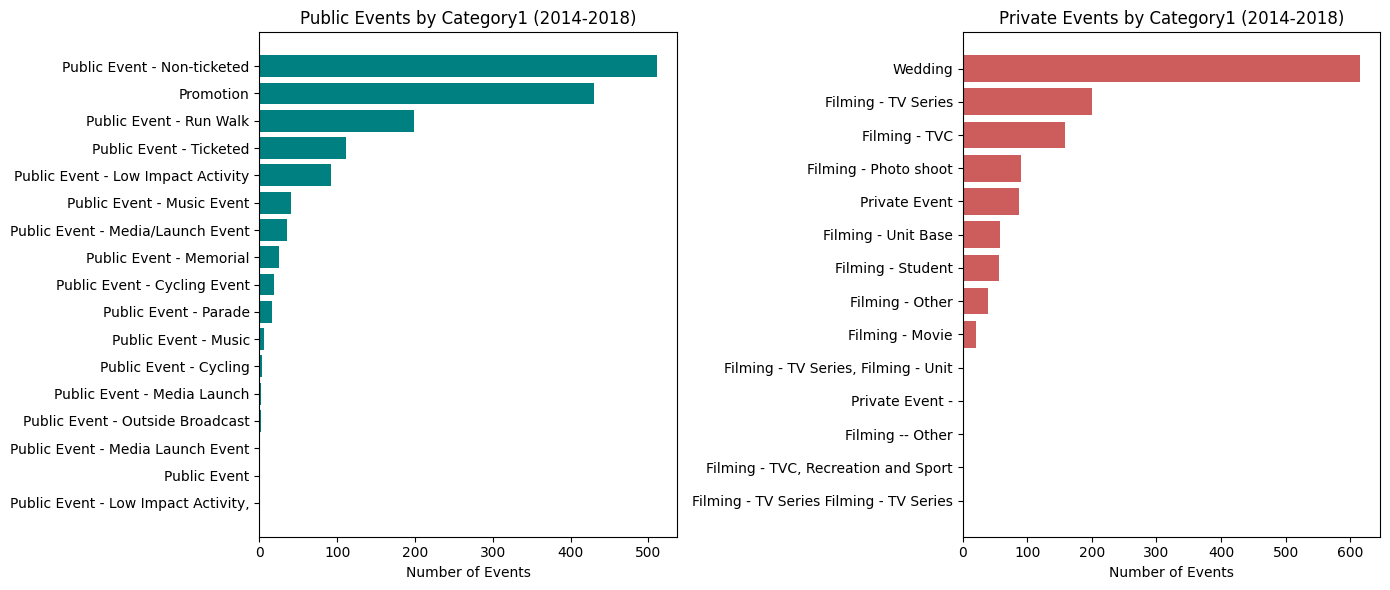

In [15]:
# Filter data for Public and Private events separately
public_events = event_df[event_df['event_type'] == 'Public']
private_events = event_df[event_df['event_type'] == 'Private']

# Count the number of events by category1
public_counts = public_events['category_1'].value_counts()
private_counts = private_events['category_1'].value_counts()

# Plot horizontal bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Public events plot
axes[0].barh(public_counts.index, public_counts.values, color='teal')
axes[0].set_title('Public Events by Category1 (2014-2018)')
axes[0].set_xlabel('Number of Events')
axes[0].invert_yaxis()

# Private events plot
axes[1].barh(private_counts.index, private_counts.values, color='indianred')
axes[1].set_title('Private Events by Category1 (2014-2018)')
axes[1].set_xlabel('Number of Events')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

**Public vs Private Events by Category (2014–2018)**

- **Public events** were primarily:
  - Non-ticketed public gatherings
  - Promotional activities
  - Run/walk events

- **Private events** were largely:
  - Weddings
  - Filming activities, including TV series, commercials (TVC), and photo shoots

This distribution highlights that public spaces in Melbourne were frequently used for community and promotional purposes, whereas private events were focused on personal celebrations and media production.

In [16]:
event_df.head()

,title,event_start,event_end,category_1,category_2,location,event_type
0,Anthony,2015-02-17,2015-02-17,Filming - Movie,NaN,Inner Suburb Locations,Private
1,Spirit Of The Game,2015-08-18,2015-08-18,Filming - Movie,NaN,Carlton Gardens,Private
2,Ali's Wedding,2015-11-30,2015-11-30,Filming - Movie,NaN,Inner Suburb Locations,Private
3,Dogfight,2016-08-23,2016-08-23,Filming - Movie,NaN,Inner Suburb Locations,Private
4,Dogfight Unit Base,2016-09-21,2016-09-21,Filming - Movie,NaN,Flagstaff Gardens,Private


In [17]:
# Define subcategory logic
def classify_event(row):
    if row['event_type'] == 'Private':
        if 'Wedding' in row['category_1']:
            return 'Wedding'
        elif 'Filming' in row['category_1']:
            return 'Filming'
        else:
            return 'Other'
    elif row['event_type'] == 'Public':
        if 'Non-ticketed' in row['category_1']:
            return 'Non-ticketed'
        elif 'Promotion' in row['category_1']:
            return 'Promotion'
        else:
            return 'Other'
    return 'Unknown'

# Apply subcategory classification
event_df['sub_category'] = event_df.apply(classify_event, axis=1)

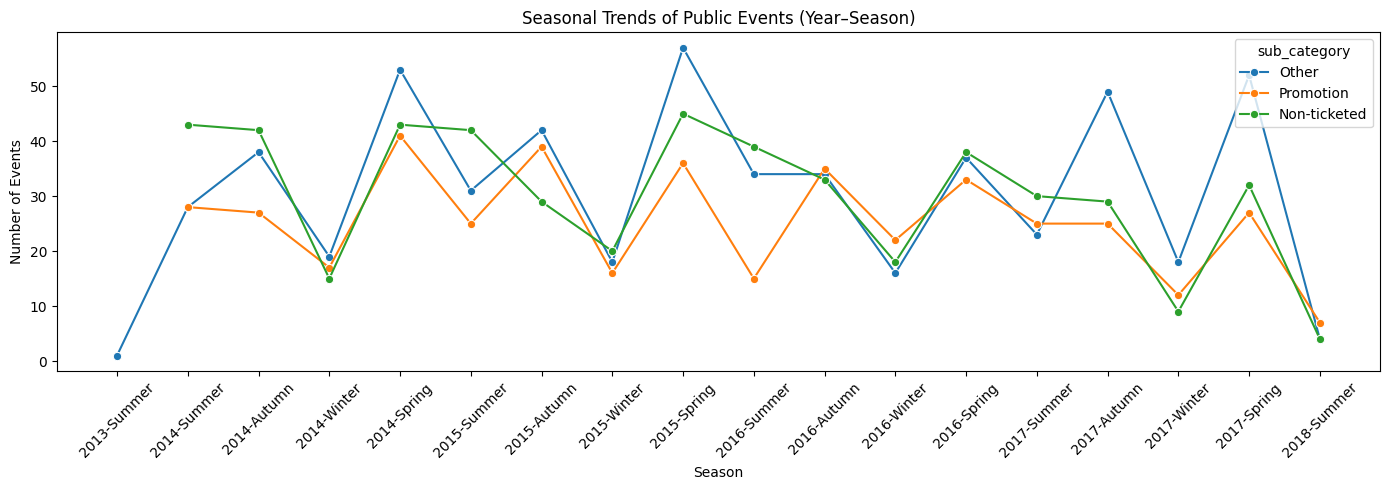

In [18]:
# Define season mapping function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Add year, month, season, and sort helper columns
season_to_month = {'Summer': '01', 'Autumn': '04', 'Winter': '07', 'Spring': '10'}

event_df['month'] = event_df['event_start'].dt.month
event_df['season'] = event_df['month'].apply(get_season)
event_df['year'] = event_df['event_start'].dt.year
event_df['season_month'] = event_df['season'].map(season_to_month)
event_df['season_sort_label'] = pd.to_datetime(event_df['year'].astype(str) + '-' + event_df['season_month'])
event_df['year_season_label'] = event_df['year'].astype(str) + '-' + event_df['season']

# Group data with season ordering
label_grouped = event_df.groupby(
    ['year_season_label', 'season_sort_label', 'event_type', 'sub_category']
).size().reset_index(name='count')

label_grouped = label_grouped.sort_values('season_sort_label')

# Plot for Public Events
plt.figure(figsize=(14, 5))
sns.lineplot(
    data=label_grouped[label_grouped['event_type'] == 'Public'],
    x='year_season_label', y='count', hue='sub_category', marker='o'
)
plt.xticks(rotation=45)
plt.title('Seasonal Trends of Public Events (Year–Season)')
plt.ylabel('Number of Events')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

* A clear seasonal pattern is evident in **public events** between 2014 and 2018, with noticeable **peaks during spring** and **reduced activity in winter.**

This trend highlights a strong preference for organizing public events in warmer, more favorable weather conditions, particularly during spring.

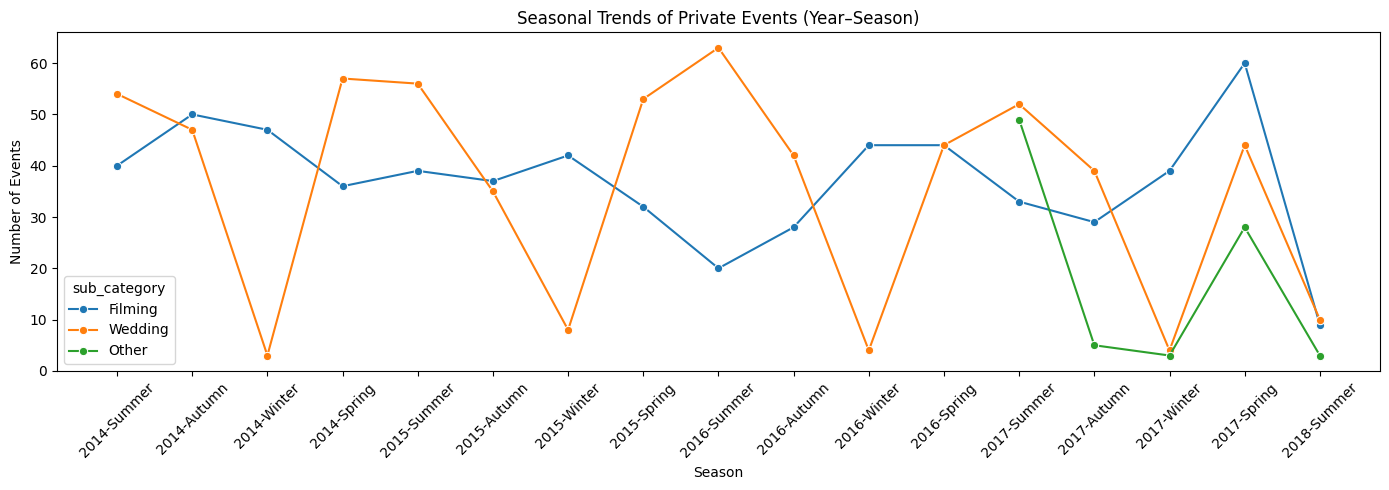

In [19]:
# Plot for Private Events
plt.figure(figsize=(14, 5))
sns.lineplot(
    data=label_grouped[label_grouped['event_type'] == 'Private'],
    x='year_season_label', y='count', hue='sub_category', marker='o'
)
plt.xticks(rotation=45)
plt.title('Seasonal Trends of Private Events (Year–Season)')
plt.ylabel('Number of Events')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

* Private events from 2014 to 2018 also exhibit a distinct seasonal pattern, with **weddings** showing **strong peaks in spring and summer** and **dropping significantly in winter.** **Filming events**, in contrast, appear more **evenly distributed throughout the year**, indicating they are less influenced by seasonal conditions.

This contrast highlights how weather and outdoor suitability primarily impact personal celebrations like weddings, while media productions maintain steady demand year-round.

---

### Overview of Pedestrian Data Frame

In [ ]:
# Keep a copy of df as it takes considerable time to reload from API
# raw_pedestrian_df = pedestrian_df.copy()

In [161]:
pedestrian_df = raw_pedestrian_df.copy()

In [163]:
pedestrian_df.head()

,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location,sensor_description
0,1381720250130,138,2025-01-30,17,17,4,21,EntPark1671_T,"-37.81996544, 144.95981454","COM Pole 1671 - Enterprize Park, Queens Bridge"
1,672020210912,67,2021-09-12,20,13,25,38,FLDegS_T,"-37.81688755, 144.96562569",Flinders Ln -Degraves St (South)
2,202020241121,20,2024-11-21,20,242,414,656,LtB170_T,"-37.81172914, 144.9682466",Chinatown-Lt Bourke St (South)
3,1082320240518,108,2024-05-18,23,13,96,109,261Will_T,"-37.81295822, 144.95678789",William St - Little Lonsdale St (West)
4,631520211102,63,2021-11-02,15,205,283,488,Bou231_T,"-37.81333081, 144.96675571",231 Bourke St


In [162]:
# Merge on 'location_id'
pedestrian_df = pedestrian_df.merge(
    p_sensor_loc[['location_id', 'sensor_description']],
    on='location_id',
    how='left'
)

# Filter to include only records up to 2025-04-15 
pedestrian_df = pedestrian_df[pedestrian_df['sensing_date'] <= '2025-04-15']

In [164]:
# Dataset Overview
print(
    f"This dataset contains {pedestrian_df.shape[0]:,} hourly pedestrian records collected from "
    f"{pedestrian_df['location_id'].nunique()} unique locations using {pedestrian_df['sensor_name'].nunique()} sensors. "
)
print(f"The data spans from {pedestrian_df['sensing_date'].min().strftime('%Y-%m-%d')} to {pedestrian_df['sensing_date'].max().strftime('%Y-%m-%d')}, "
    f"covering all 24 hours of the day.")

This dataset contains 2,254,901 hourly pedestrian records collected from 97 unique locations using 95 sensors. 
The data spans from 2021-07-01 to 2025-04-15, covering all 24 hours of the day.


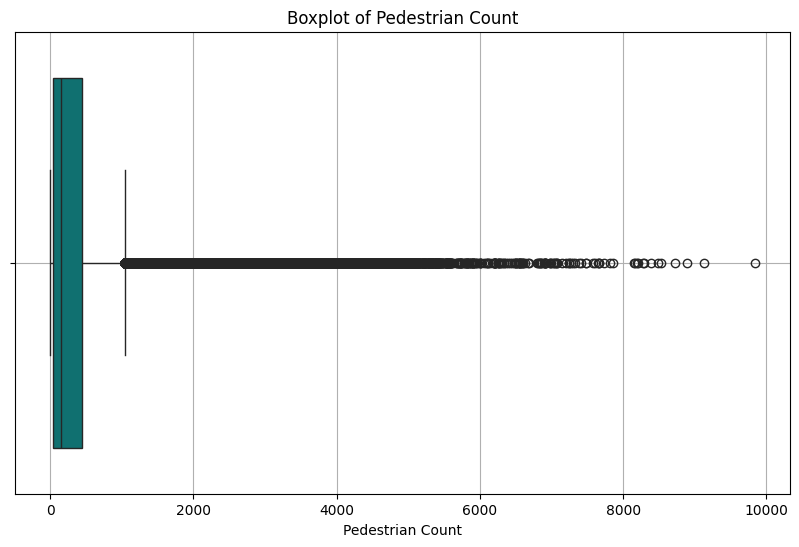

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pedestrian_df['pedestriancount'], color='teal')
plt.title("Boxplot of Pedestrian Count")
plt.xlabel("Pedestrian Count")
plt.grid(True)
plt.show()

This boxplot shows that most locations and times have low pedestrian counts, usually under 500. 

But there are also many higher values, going up to nearly 10,000. They likely come from busy areas like the city center or places with special events. So, the data clearly shows that foot traffic can change a lot depending on the location and time.

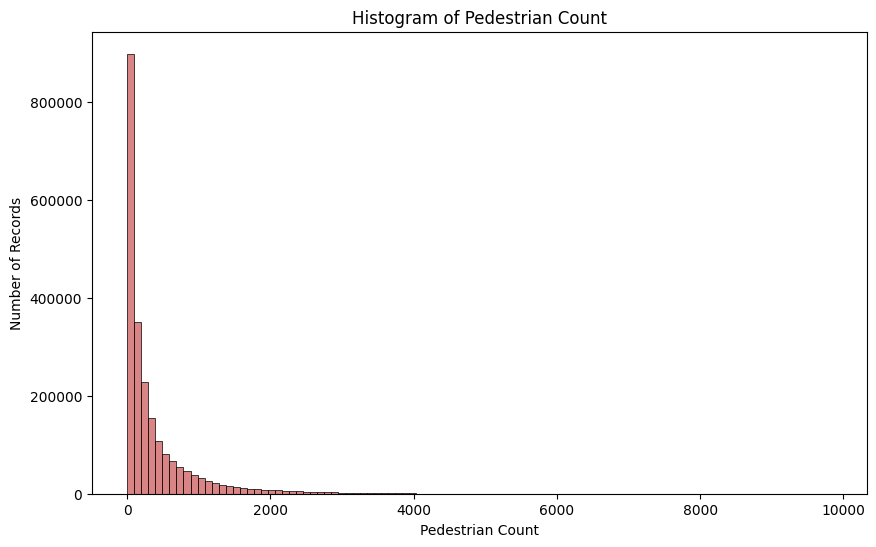

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(pedestrian_df['pedestriancount'], bins=100, kde=False, color = 'indianred')
plt.title("Histogram of Pedestrian Count")
plt.xlabel("Pedestrian Count")
plt.ylabel("Number of Records")
plt.show()

The histogram shows that most pedestrian counts are low, with a large number of records having lower counts. This is expected in a city environment, where only a few places like CBDs or event areas experience very high foot traffic.

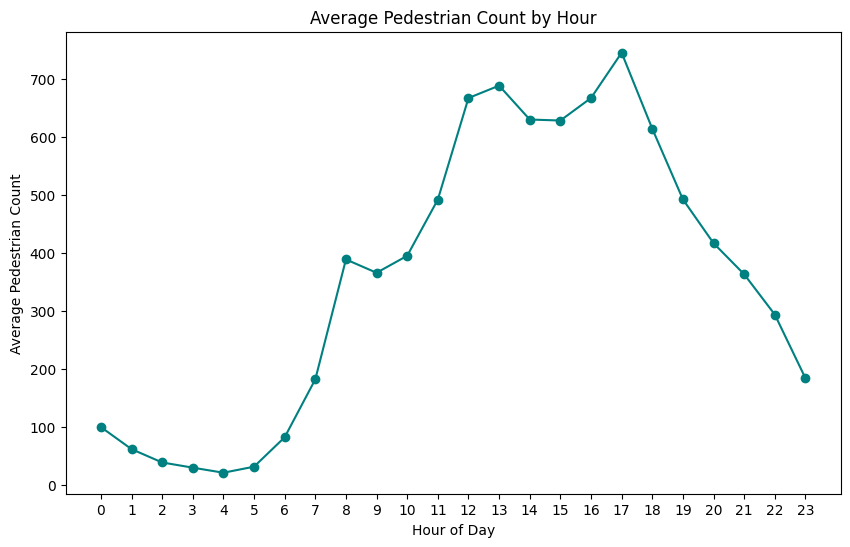

In [95]:
avg_by_hour = pedestrian_df.groupby('hourday')['pedestriancount'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_by_hour['hourday'], avg_by_hour['pedestriancount'], 
         marker='o', color='teal')

plt.title("Average Pedestrian Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Pedestrian Count")
plt.xticks(range(0, 24))
plt.show()

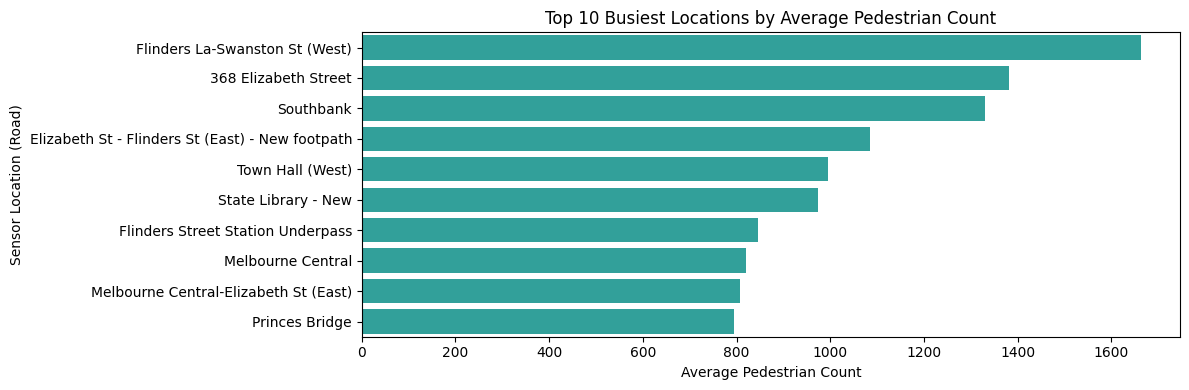

In [ ]:
# Group by location and calculate average pedestrian count
busy_locations = pedestrian_df.groupby(['location_id', 'sensor_description'])['pedestriancount'].mean().reset_index()

# Sort and get top 20
top_10 = busy_locations.sort_values(by='pedestriancount', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 4))
sns.barplot(data=top_10, y='sensor_description', x='pedestriancount', color='lightseagreen')
plt.title("Top 10 Busiest Locations by Average Pedestrian Count")
plt.xlabel("Average Pedestrian Count")
plt.ylabel("Sensor Location (Road)")
plt.tight_layout()
plt.show()

This chart shows the top 10 busiest locations based on average pedestrian count. Flinders La–Swanston St (West), Elizabeth Street, and Southbank are among the most active areas, making the areas around them suitable for large public events or campaigns.


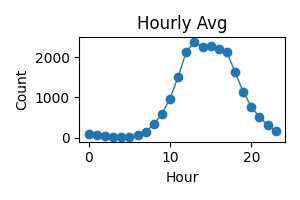
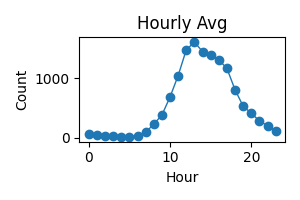
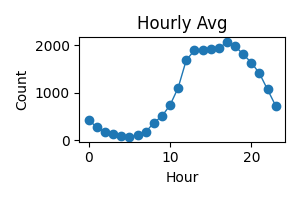
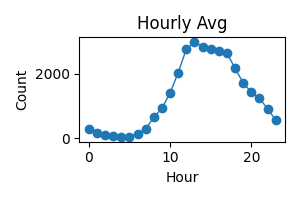
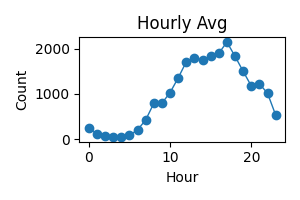
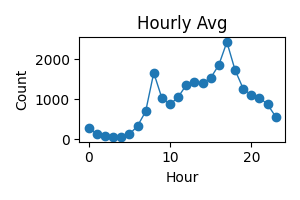
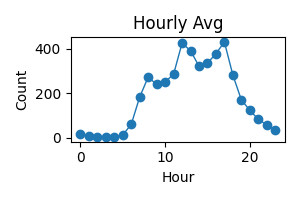
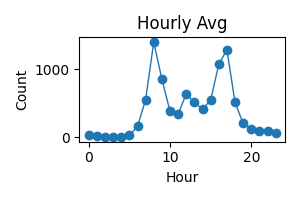
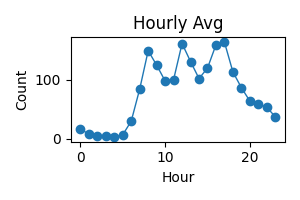
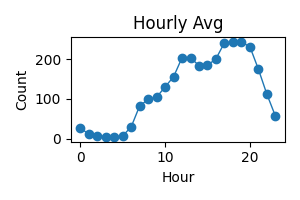
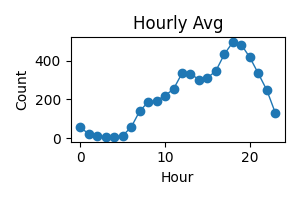
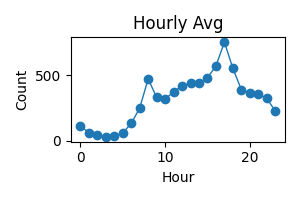
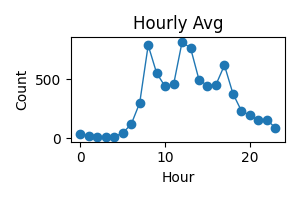
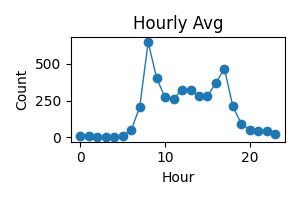
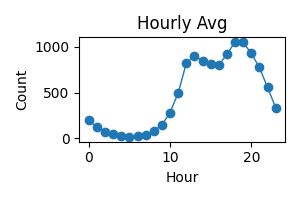
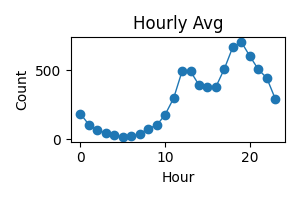
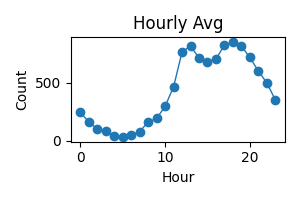
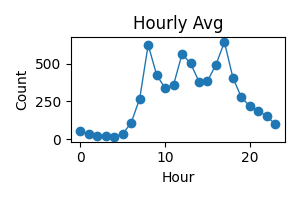
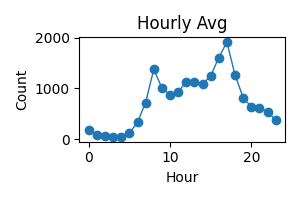
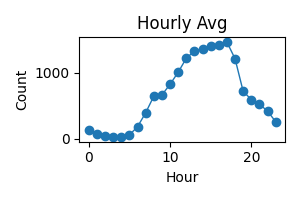
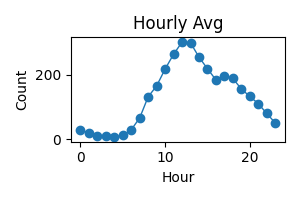
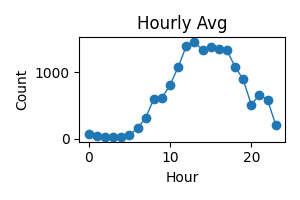
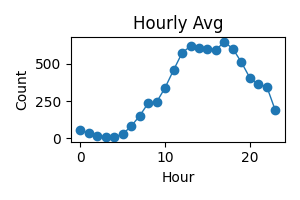
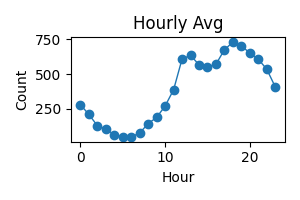
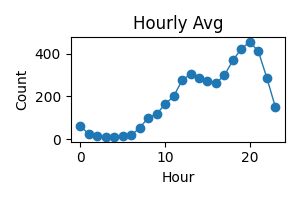
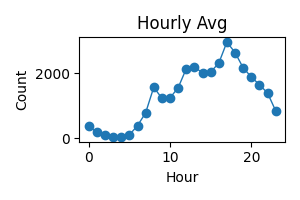
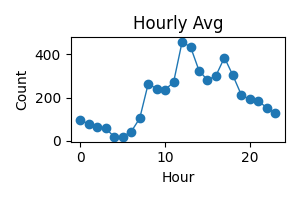
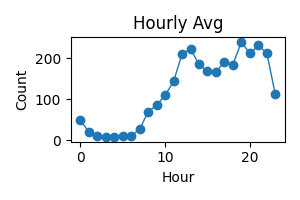
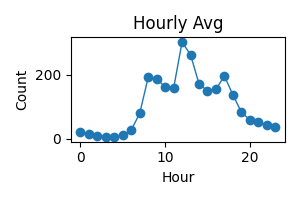
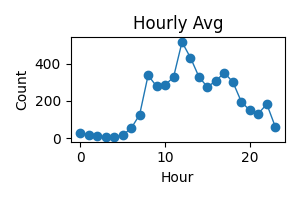
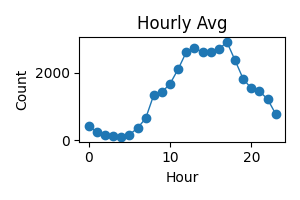
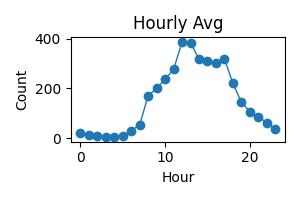
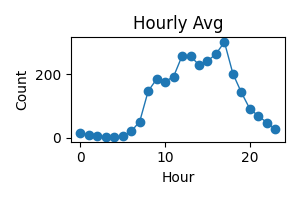
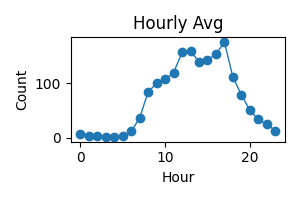
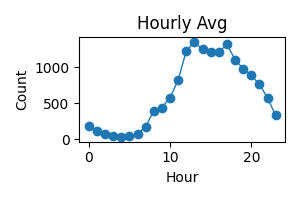
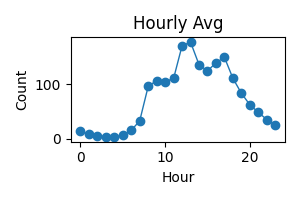
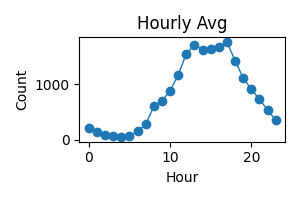
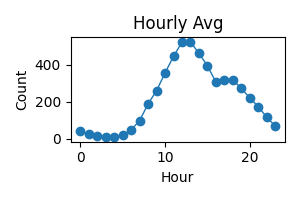
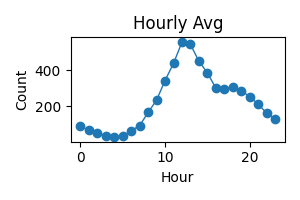
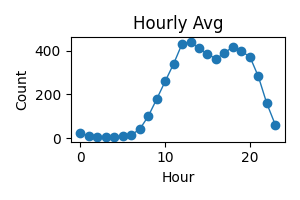
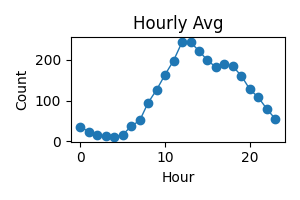
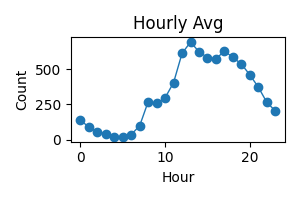
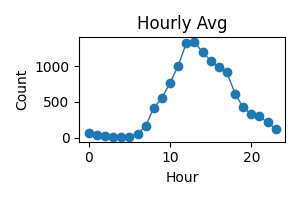
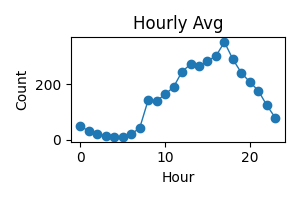
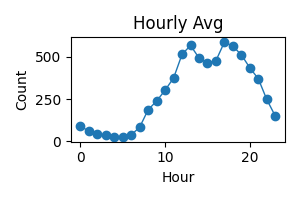
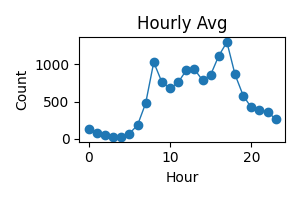
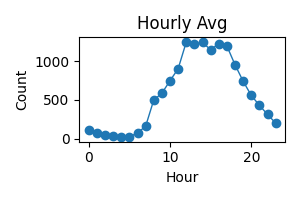
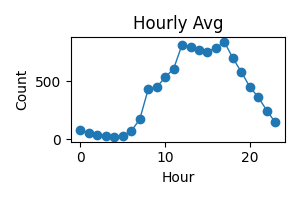
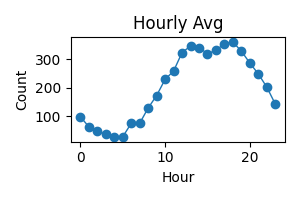
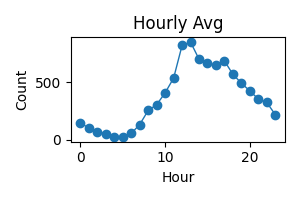
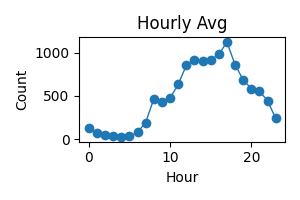
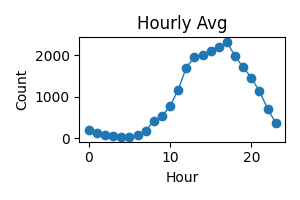
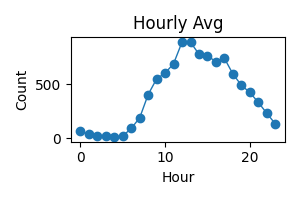
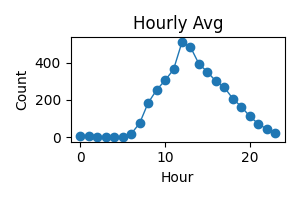
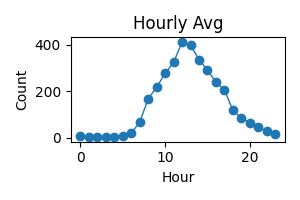
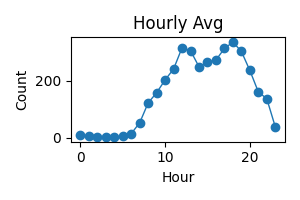
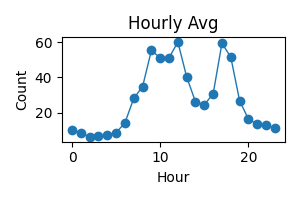
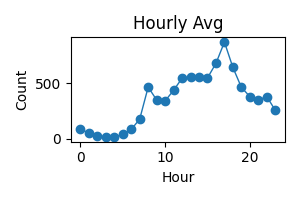
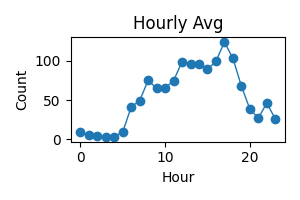
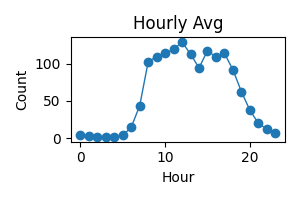
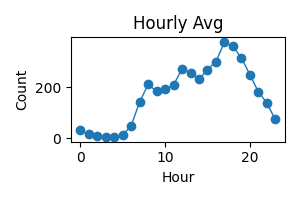
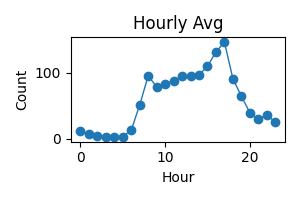
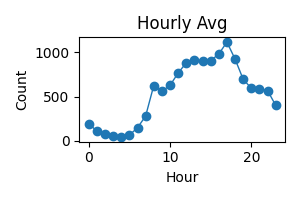
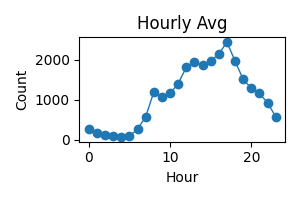
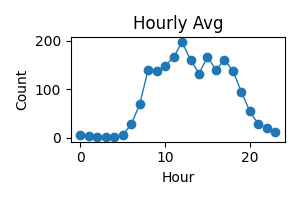
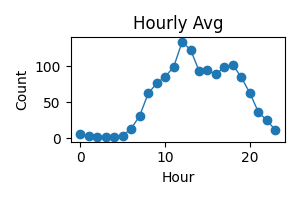
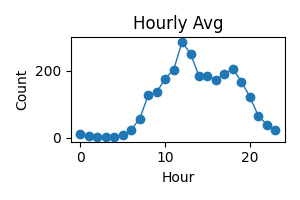
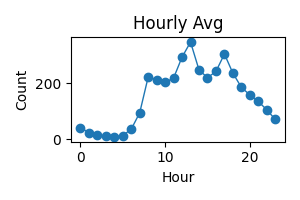
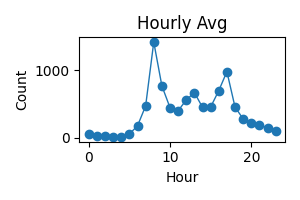
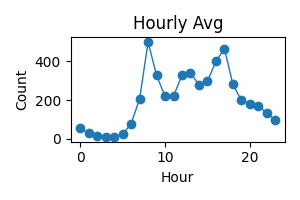
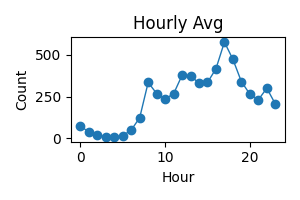
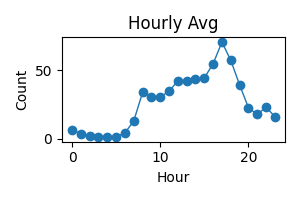
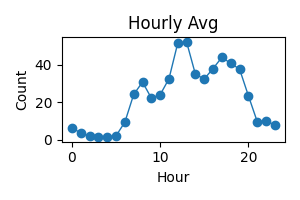
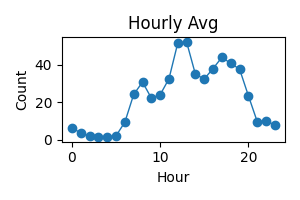
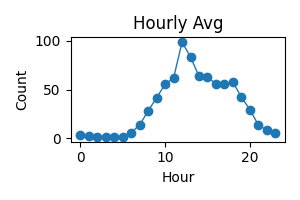
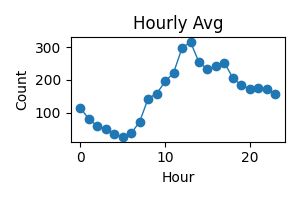
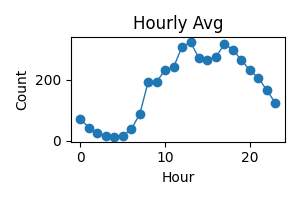
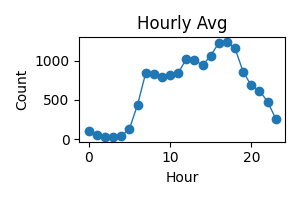
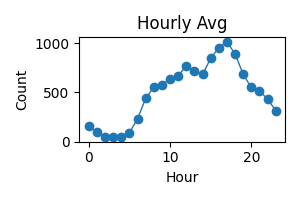
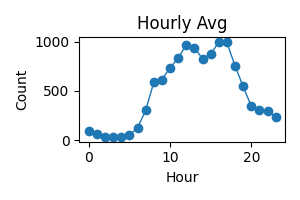
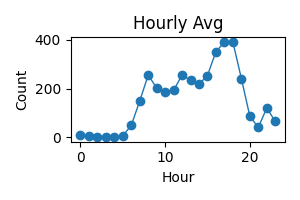
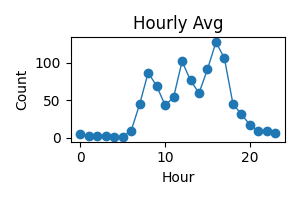
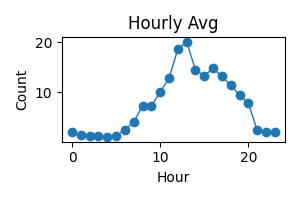
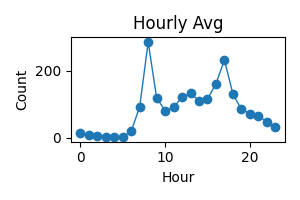
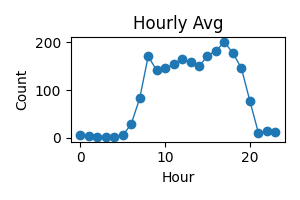
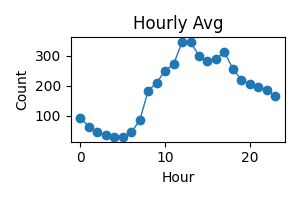
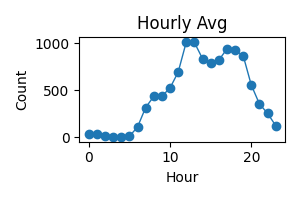
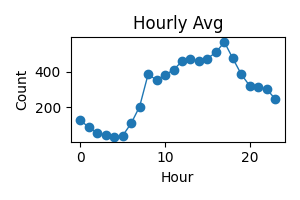
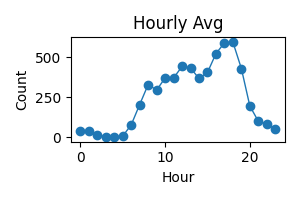
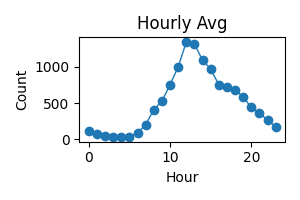
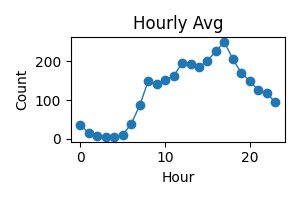
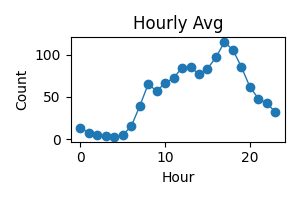
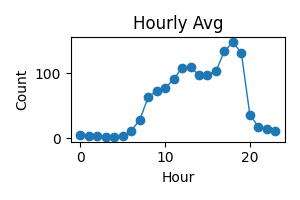
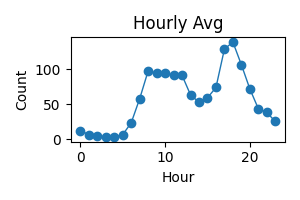
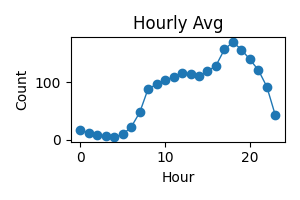
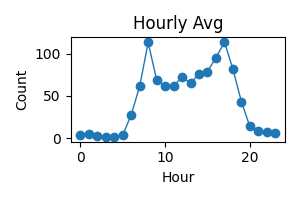
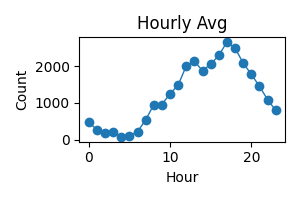

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Extract latitude and longitude
pedestrian_df[['lat', 'lon']] = pedestrian_df['location'].str.split(', ', expand=True).astype(float)

# Aggregate average pedestrian count per location
agg_df = pedestrian_df.groupby(
    ['location_id', 'sensor_description', 'lat', 'lon'],
    as_index=False
)['pedestriancount'].mean()
agg_df.rename(columns={'pedestriancount': 'avg_count'}, inplace=True)

# Scale avg_count and apply KMeans clustering
scaler = StandardScaler()
scaled = scaler.fit_transform(agg_df[['avg_count']])
kmeans = KMeans(n_clusters=4, random_state=1)
agg_df['cluster'] = kmeans.fit_predict(scaled)

# Order clusters based on avg pedestrian count
cluster_order = agg_df.groupby('cluster')['avg_count'].mean().sort_values().index.tolist()
ordered_colors = ['green', 'gold', 'darkorange', 'indianred']
color_map = {cluster: ordered_colors[i] for i, cluster in enumerate(cluster_order)}

# Function to generate embedded line chart in popup
def generate_popup_html(sensor_name, avg_count, hourly_data):
    fig, ax = plt.subplots(figsize=(3, 2))
    ax.plot(hourly_data.index, hourly_data.values, linewidth=1)
    ax.set_title('Hourly Avg')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')
    plt.tight_layout()

    buffer = BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.read()).decode()
    plt.close()

    html = f"""
    <h4>{sensor_name}</h4>
    <p>Avg Count: {int(avg_count)}</p>
    <img src='data:image/png;base64,{img_base64}' width='220'/>
    """
    return html

# Create map
mel_map = folium.Map(location=[-37.81, 144.96], zoom_start=14, tiles='CartoDB positron')

legend_html = '''
 <div style="
     position: fixed; 
     bottom: 50px; left: 50px; width: 180px; height: 150px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; border-radius:8px; padding: 10px;
     box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
     <b>Average Pedestrian Count</b><br>
     <i style="background:green; width:10px; height:10px; float:left; margin-right:8px; opacity:0.9;"></i> Very Low<br>
     <i style="background:gold; width:10px; height:10px; float:left; margin-right:8px; opacity:0.9;"></i> Low<br>
     <i style="background:darkorange; width:10px; height:10px; float:left; margin-right:8px; opacity:0.9;"></i> Moderate<br>
     <i style="background:indianred; width:10px; height:10px; float:left; margin-right:8px; opacity:0.9;"></i> High<br>
 </div>
'''

mel_map.get_root().html.add_child(folium.Element(legend_html))

# Add each marker with chart popup and color by cluster
for _, row in agg_df.iterrows():
    hourly_data = pedestrian_df[
        pedestrian_df['sensor_description'] == row['sensor_description']
    ].groupby('hourday')['pedestriancount'].mean()

    popup_html = generate_popup_html(row['sensor_description'], row['avg_count'], hourly_data)
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        color=color_map[row['cluster']],
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(mel_map)

mel_map